### Installation of cuDF/cuML

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 300 (delta 72), reused 43 (delta 21), pack-reused 171
Receiving objects: 100% (300/300), 86.52 KiB | 17.30 MiB/s, done.
Resolving deltas: 100% (134/134), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(0)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
#!/usr/bin/env python
import os, sys, io
import subprocess
from pathlib import Path

# CFFI fix with pip 
output = subprocess.Popen(["pip uninstall --yes cffi"], shell=True, stderr=subprocess.STDOUT, 
    stdout=subprocess.PIPE)
for line in io.TextIOWrapper(output.stdout, encoding="utf-8"):
  if(line == ""):
    break
  else:
    print(line.rstrip())
output = subprocess.Popen(["pip uninstall --yes cryptography"], shell=True, stderr=subprocess.STDOUT, 
    stdout=subprocess.PIPE)
for line in io.TextIOWrapper(output.stdout, encoding="utf-8"):
  if(line == ""):
    break
  else:
    print(line.rstrip())
output = subprocess.Popen(["pip install cffi==1.15.0"], shell=True, stderr=subprocess.STDOUT, 
    stdout=subprocess.PIPE)
for line in io.TextIOWrapper(output.stdout, encoding="utf-8"):
  if(line == ""):
    break
  else:
    print(line.rstrip())

# Install RAPIDS
pkg = "rapids"
if(sys.argv[1] == "nightly"):
  release =  ["rapidsai-nightly", "22.02"]
  print("Installing RAPIDS Nightly "+release[1])
else:
  release = ["rapidsai", "21.12"]
  print("Installing RAPIDS Stable "+release[1])

pkg = "rapids"
print("Starting the RAPIDS install on Colab.  This will take about 15 minutes.")

output = subprocess.Popen(["conda install -y --prefix /usr/local -c "+release[0]+" -c nvidia -c conda-forge python=3.7 cudatoolkit=11.2 "+pkg+"="+release[1]+" llvmlite gcsfs openssl dask-sql"], shell=True, stderr=subprocess.STDOUT, 
    stdout=subprocess.PIPE)
for line in io.TextIOWrapper(output.stdout, encoding="utf-8"):
  if(line == ""):
    break
  else:
    print(line.rstrip())

print("RAPIDS conda installation complete.  Updating Colab's libraries...")
import sys, os, shutil
sys.path.append('/usr/local/lib/python3.7/site-packages/')
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'

os.environ["CONDA_PREFIX"] = "/usr/local"
for so in ['cudf', 'rmm', 'nccl', 'cuml', 'cupy']:
  fn = 'lib'+so+'.so'
  source_fn = '/usr/local/lib/'+fn
  dest_fn = '/usr/lib/'+fn
  if os.path.exists(source_fn):
    print(f'Copying {source_fn} to {dest_fn}')
    shutil.copyfile(source_fn, dest_fn)

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

  environment location: /usr/local

In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
# !python rapidsai-csp-utils/colab/install_rapids.py stable
import os, sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Traceback (most recent call last):



In [ ]:
!conda install -y --prefix /usr/local \
      -c rapidsai-nightly/label/xgboost -c rapidsai-nightly -c nvidia -c conda-forge \
      python=3.6 cudatoolkit=10.1 \
      cudf=$RAPIDS_VERSION cuml gcsfs pynvml \

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
!conda list | grep cudf

cudf                      21.12.02        cuda_11_py37_g06540b9b37_0    rapidsai
cudf_kafka                21.12.02        py37_g06540b9b37_0    rapidsai
dask-cudf                 21.12.02        cuda_11_py37_g06540b9b37_0    rapidsai
libcudf                   21.12.02        cuda11_g06540b9b37_0    rapidsai
libcudf_kafka             21.12.02          g06540b9b37_0    rapidsai


In [ ]:
# import nvstrings, nvcategory, cudf
import cudf
import cuml
import os
import numpy as np
import pandas as pd

from cuml.tsa.arima import ARIMA

import warnings
warnings.filterwarnings("ignore")

## Download and Unzip the dataset.

In [ ]:
# url_to_the_zip_file = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/34330/3265183/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647437599&Signature=qVPxXAvAiFlZLpO%2Fp287NXm%2FlUOymBxRMs7NJKMGXlm3afW9PV9LuNalMJS56E%2BjsMSHh46ouLS6gNHYbyPwmdLSQiPpLQPGU6NTKTNprbDUOgYb2rqC4w6AgLOpdRh%2FGdabYAVAdjIh24Teoj5k%2Bs%2Fybm00sxAGf358%2BcxjEonvvUJDEhK7GTtv9NAFxAfsO%2F69xOWSkLEhjjnCwQ3QzfXWxbuYVnqlwy0dwQ6S%2F8iQappRaQg2%2BF9j76t1ay0B3Kg3ANj0P5EuVMDL2KVld3cQLiM7DPi9vQQV531T8snYsbiHjoE%2BhkH6w%2BWeULvu5UpDSaiVRepgtoscjgM8ig%3D%3D&response-content-disposition=attachment%3B+filename%3D2110446-data-science-and-data-engineering-2022.zip"
# new_file_name = "2110446-data-science-and-data-engineering-2022.zip"

# !rm -f "$new_file_name"
# !wget -c "$url_to_the_zip_file" -O "$new_file_name"
# !unzip "$new_file_name"

In [ ]:
url_to_the_zip_file = "https://raw.githubusercontent.com/shrria/2110446-data-science-and-data-engineering-2021_project/main/datasci_dataset_2022.zip"
new_file_name = "datasci_dataset_2022.zip"

!rm -f "$new_file_name"
!wget -c "$url_to_the_zip_file" -O "$new_file_name"
!unzip "$new_file_name"

--2022-03-19 07:49:29--  https://raw.githubusercontent.com/shrria/2110446-data-science-and-data-engineering-2021_project/main/datasci_dataset_2022.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6724801 (6.4M) [application/zip]
Saving to: ‘datasci_dataset_2022.zip’

datasci_dataset_202 100%[===================>]   6.41M  --.-KB/s    in 0.05s   

2022-03-19 07:49:29 (122 MB/s) - ‘datasci_dataset_2022.zip’ saved [6724801/6724801]

Archive:  datasci_dataset_2022.zip
   creating: datasci_dataset_2022/
   creating: datasci_dataset_2022/BKK/
  inflating: datasci_dataset_2022/BKK/position.txt  
   creating: datasci_dataset_2022/BKK/test/
  inflating: datasci_dataset_2022/BKK/test/bkk_temp_test.csv  
  inflating: datasci_dataset_2022/BKK/test/bkk_test.csv  
  in

## read_csv()

In [ ]:
def toDF(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize(None)
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.interpolate(inplace=True)
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  # pad() is similar to fillna() with forward filling
  temp_df = temp_df.resample('h').pad()
  # temp_df.index = pd.DatetimeIndex(temp_df.index)

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]
  
  # padding first and last indices
  # df = df.ffill()
  # df = df.bfill()

  return df

In [ ]:
def toDFtest(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  temp_df = temp_df.resample('h').bfill()

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]

  return df

In [ ]:
bkk_train = toDF('BKK/train/bkk_train.csv', 'BKK/train/bkk_temp_surface.csv', 'BKK/train/bkk_weather_wind.csv')
bkk_test = toDF('BKK/test/bkk_test.csv', 'BKK/test/bkk_temp_test.csv', 'BKK/test/bkk_wind_test.csv')

cnx_train = toDF('Chiangmai/train/chiangmai_train.csv', 'Chiangmai/train/chiangmai_temp_surface.csv', 'Chiangmai/train/chiangmai_weather_wind.csv')
cnx_test = toDF('Chiangmai/test/chiangmai_test.csv', 'Chiangmai/test/chiangmai_temp_test.csv', 'Chiangmai/test/chiangmai_wind_test.csv')

kkc_train = toDF('Khonkaen/train/khonkhan_train.csv', 'Khonkaen/train/khonkaen_temp_surface.csv', 'Khonkaen/train/khonkaen_weather_wind.csv')
kkc_test = toDF('Khonkaen/test/khonkhan_test.csv', 'Khonkaen/test/khonkaen_temp_test.csv', 'Khonkaen/test/khonkaen_wind_test.csv')

rayong_train = toDF('Rayong/train/rayong_train.csv', 'Rayong/train/rayong_temp_surface.csv', 'Rayong/train/rayong_weather_wind.csv')
rayong_test = toDF('Rayong/test/rayong_test.csv', 'Rayong/test/rayong_temp_test.csv', 'Rayong/test/rayong_wind_test.csv')

saraburi_train = toDF('Saraburi/train/saraburi_train.csv', 'Saraburi/train/saraburi_temp_surface.csv', 'Saraburi/train/saraburi_weather_wind.csv')
saraburi_test = toDF('Saraburi/test/saraburi_test.csv', 'Saraburi/test/saraburi_temp_test.csv', 'Saraburi/test/saraburi_wind_test.csv')

surat_train = toDF('Surat/train/surat_train.csv', 'Surat/train/surat_temp_surface.csv', 'Surat/train/surat_weather_wind.csv')
surat_test = toDF('Surat/test/surat_test.csv', 'Surat/test/surat_temp_test.csv', 'Surat/test/surat_wind_test.csv')

In [ ]:
train_set={}
train_set['BKK'] = bkk_train
train_set['CNX'] = cnx_train
train_set['KKC'] = kkc_train
train_set['RAY'] = rayong_train
train_set['SARA'] = saraburi_train
train_set['SURAT'] = surat_train

test_set={}
test_set['BKK'] = bkk_test
test_set['CNX'] = cnx_test
test_set['KKC'] = kkc_test
test_set['RAY'] = rayong_test
test_set['SARA'] = saraburi_test
test_set['SURAT'] = surat_test

## Number of null values

### Before Dropping

In [ ]:
null_counts_bkk_train = bkk_train.isnull().sum()
print("[bkk_train] Number of null values in each column:\n{}".format(null_counts_bkk_train))
print('\n')

null_counts_cnx_train = cnx_train.isnull().sum()
print("[cnx_train] Number of null values in each column:\n{}".format(null_counts_cnx_train))
print('\n')

null_counts_kkc_train = kkc_train.isnull().sum()
print("[kkc_train] Number of null values in each column:\n{}".format(null_counts_kkc_train))
print('\n')

null_counts_rayong_train = rayong_train.isnull().sum()
print("[rayong_train] Number of null values in each column:\n{}".format(null_counts_rayong_train))
print('\n')

null_counts_saraburi_train = saraburi_train.isnull().sum()
print("[saraburi_train] Number of null values in each column:\n{}".format(null_counts_saraburi_train))
print('\n')

null_counts_surat_train = surat_train.isnull().sum()
print("[surat_train] Number of null values in each column:\n{}".format(null_counts_surat_train))

[bkk_train] Number of null values in each column:
Temp         3
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[cnx_train] Number of null values in each column:
Temp         6
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[kkc_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[rayong_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[saraburi_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[surat_train] Number of null values in each column:
Temp         126
WindSpeed      0
WindDir        0
PM25           0
dtype: int64


### Drop null-valued rows (Temp & PM25)

In [ ]:
bkk_train.dropna(subset=['Temp','PM25'], inplace=True)

cnx_train.dropna(subset=['Temp','PM25'], inplace=True)

kkc_train.dropna(subset=['Temp','PM25'], inplace=True)

rayong_train.dropna(subset=['Temp','PM25'], inplace=True)

saraburi_train.dropna(subset=['Temp','PM25'], inplace=True)

surat_train.dropna(subset=['Temp','PM25'], inplace=True)

## Graph Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
def multiDisplot(dataset, col, hist=False, xlim=None):
  for prov, _ in dataset.items():
    sns.distplot(dataset[prov][col], hist=hist, label=prov)
    # print(f"{prov} {col}={dataset[prov][col].mean()}")
  plt.xlim(xlim)
  plt.legend()
  plt.show()

In [ ]:
# multiDisplot(train_set, 'PM25', xlim=(-10, 120), hist=True)

In [ ]:
# multiDisplot(train_set, 'Temp', hist=True)

In [ ]:
# multiDisplot(train_set, 'WindDir', hist=True)

In [ ]:
# multiDisplot(train_set, 'WindSpeed', hist=True)

## Handle outliers

In [ ]:
class Handle_Outliers:
  def __init__(self, dataset):
    self.dataset=dataset.copy()
    self.dataShape={}

    for prov, dfcol in dataset.items():
      self.dataShape[prov] = {}
      for col, _ in dfcol.items():
        self.dataShape[prov][col] = {'Kurt':{}, 'Skew':{}}
   
  def plotIQR(self, province, col, title="", thresh=None, fig=None, subplots=None, figsize=None):
    dataset = self.dataset

    if subplots is None: subplots = [211, 212]
    if figsize is None: figsize = (10,8)


    if fig is not None:
      rows = subplots[0]//100
      cols = (subplots[0]%100)//10
      fig.add_subplot(rows, cols, subplots[0]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[0])

    plt.title(title)
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    if thresh:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    ax = dataset[province][col].plot(kind='kde')

    if fig is not None:
      rows = subplots[1]//100
      cols = (subplots[1]%100)//10
      fig.add_subplot(rows, cols, subplots[1]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[1])
      
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    sns.boxplot(x=dataset[province][col])

    if thresh is not None:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    if subplots is None:
      plt.show()

  def calcDataShape(self, province, col, verbose=0, save_slot=None):
    dataset = self.dataset

    kurtosis_value = kurtosis(dataset[province][col])
    skew_value = skew(dataset[province][col])

    if (verbose>0):
      print("\n")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")

    if (save_slot is not None):
      self.saveDataShape(province, col, kurtosis_value, skew_value, save_slot)
  
  def showDataShape(self, province, col, save_slot=None):
    dataShape = self.dataShape

    if (save_slot is not None):
      kurtosis_value = dataShape[province][col]['Kurt'][save_slot]
      skew_value = dataShape[province][col]['Skew'][save_slot]
      print(f"{save_slot}:")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")
      print("\n")

    else:
      for sav_slot, _ in dataShape[province][col]['Kurt'].items():
        kurtosis_value = dataShape[province][col]['Kurt'][sav_slot]
        skew_value = dataShape[province][col]['Skew'][sav_slot]
        print(f"{sav_slot}:")
        print(f"kurtosis_value = {kurtosis_value}")
        print(f"skew_value = {skew_value}")
        print("\n")
  
  def saveDataShape(self, province, col, kurt, skew, save_slot):
    dataShape = self.dataShape

    dataShape[province][col]['Kurt'][save_slot] = kurt
    dataShape[province][col]['Skew'][save_slot] = skew
  
  def addColumns(self, col, new_col, func):
    dataset = self.dataset
    dataShape = self.dataShape

    for prov, _ in dataset.items():
      dataset[prov][new_col] = func(dataset[prov][col])
      dataShape[prov][new_col] = {'Kurt':{}, 'Skew':{}}
  
  def calcOutliersMinMax(self, province, col, C_std):
    dataset = self.dataset

    thresh_min = dataset[province][col].mean() - C_std*dataset[province][col].std()
    thresh_min = 0 if (thresh_min<0) else thresh_min

    thresh_max = dataset[province][col].mean() + C_std*dataset[province][col].std()
    
    return thresh_min, thresh_max
  
  def setOutliersThreshold(self, province, col, new_col, thresh):
    dataset = self.dataset

    min, max = thresh[province]['min'], thresh[province]['max']

    dataset[province][new_col] = dataset[province][col]

    dataset[province].loc[dataset[province][new_col]<min, new_col] = min
    dataset[province].loc[dataset[province][new_col]>max, new_col] = max

### Using IQR to detect outliers

In [ ]:
handle_outliers = Handle_Outliers(train_set)

#### Before Log

In [ ]:
# handle_outliers.plotIQR('BKK', 'PM25', 'Bangkok_Train PM2.5')
# handle_outliers.calcDataShape('BKK', 'PM25', save_slot='Before')

In [ ]:
# handle_outliers.plotIQR('CNX', 'PM25', "Chiangmai_Train PM2.5")
# handle_outliers.calcDataShape('CNX', 'PM25', save_slot='Before')

In [ ]:
# handle_outliers.plotIQR('KKC', 'PM25', "Khonkaen_Train PM2.5")
# handle_outliers.calcDataShape('KKC', 'PM25', save_slot='Before')

In [ ]:
# handle_outliers.plotIQR('RAY', 'PM25', "Rayong_Train PM2.5")
# handle_outliers.calcDataShape('RAY', 'PM25', save_slot='Before')

In [ ]:
# handle_outliers.plotIQR("SARA", 'PM25', "Saraburi_Train PM2.5")
# handle_outliers.calcDataShape("SARA", 'PM25', save_slot='Before')

In [ ]:
# handle_outliers.plotIQR('SURAT', 'PM25', "Surat_Train PM2.5")
# handle_outliers.calcDataShape('SURAT', 'PM25', save_slot='Before')

#### After Log

In [ ]:
handle_outliers.addColumns('PM25', 'Log_PM25', lambda x: np.log(1+x))

In [ ]:
# handle_outliers.plotIQR('BKK', 'Log_PM25', "Bangkok_Train Log(PM2.5)")
# handle_outliers.calcDataShape('BKK', 'Log_PM25', save_slot='After')

In [ ]:
# handle_outliers.plotIQR('CNX', 'Log_PM25', "Chiangmai_Train Log(PM2.5)")
# handle_outliers.calcDataShape('CNX', 'Log_PM25', save_slot='After')

In [ ]:
# handle_outliers.plotIQR('KKC', 'Log_PM25', "Khonkaen_Train Log(PM2.5)")
# handle_outliers.calcDataShape('KKC', 'Log_PM25', save_slot='After')

In [ ]:
# handle_outliers.plotIQR('RAY', 'Log_PM25', "Rayong_Train Log(PM2.5)")
# handle_outliers.calcDataShape('RAY', 'Log_PM25', save_slot='After')

In [ ]:
# handle_outliers.plotIQR('SARA', 'Log_PM25', "Saraburi_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SARA', 'Log_PM25', save_slot='After')

In [ ]:
# handle_outliers.plotIQR('SURAT', 'Log_PM25', "Surat_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SURAT', 'Log_PM25', save_slot='After')

#### Set the outliers to min or max

In [ ]:
# handle_outliers.showDataShape('BKK', 'PM25', 'Before')
# handle_outliers.showDataShape('BKK', 'Log_PM25')

In [ ]:
train_set['BKK'].describe(include='all')

,Temp,WindSpeed,WindDir,PM25,Log_PM25
count,26299.000000,26299.000000,26299.000000,26299.000000,26299.000000
mean,29.810069,20.479410,167.592684,27.309441,3.217490
std,2.653087,13.030854,92.230443,15.368269,0.494102
min,17.200000,0.000000,0.000000,3.000000,1.386294
25%,28.000000,11.000000,80.000000,17.000000,2.890372
50%,29.600000,17.000000,155.000000,23.000000,3.178054
75%,31.600000,27.000000,260.000000,34.000000,3.555348
max,38.100000,85.000000,360.000000,130.000000,4.875197


In [ ]:
thresh = {}

for prov, _ in train_set.items():
    thresh[prov] = {}
    thresh[prov]['min'], thresh[prov]['max'] = handle_outliers.calcOutliersMinMax(prov, 'Log_PM25', 3)
    handle_outliers.setOutliersThreshold(prov, 'Log_PM25', 'new_Log_PM25', thresh)

handle_outliers.addColumns('new_Log_PM25','new_PM25', lambda x: np.exp(x)-1)

##### Example 'Saraburi' : Boxplots of old and new PM2.5 after outlier handling

In [ ]:
handle_outliers.dataset['SARA'].describe()

,Temp,WindSpeed,WindDir,PM25,Log_PM25,new_Log_PM25,new_PM25
count,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000
mean,28.329245,21.015360,173.065546,33.852616,3.351286,3.354525,33.851236
std,4.062801,13.520995,83.727460,21.925800,0.671915,0.660619,21.777554
min,14.000000,0.000000,0.000000,1.000000,0.693147,1.335541,2.802054
25%,25.400000,11.000000,90.000000,18.000000,2.944439,2.944439,18.000000
50%,27.800000,18.000000,180.000000,29.000000,3.401197,3.401197,29.000000
75%,31.200000,28.000000,250.000000,44.000000,3.806662,3.806662,44.000000
max,40.900000,91.000000,360.000000,407.000000,6.011267,5.367030,213.225732


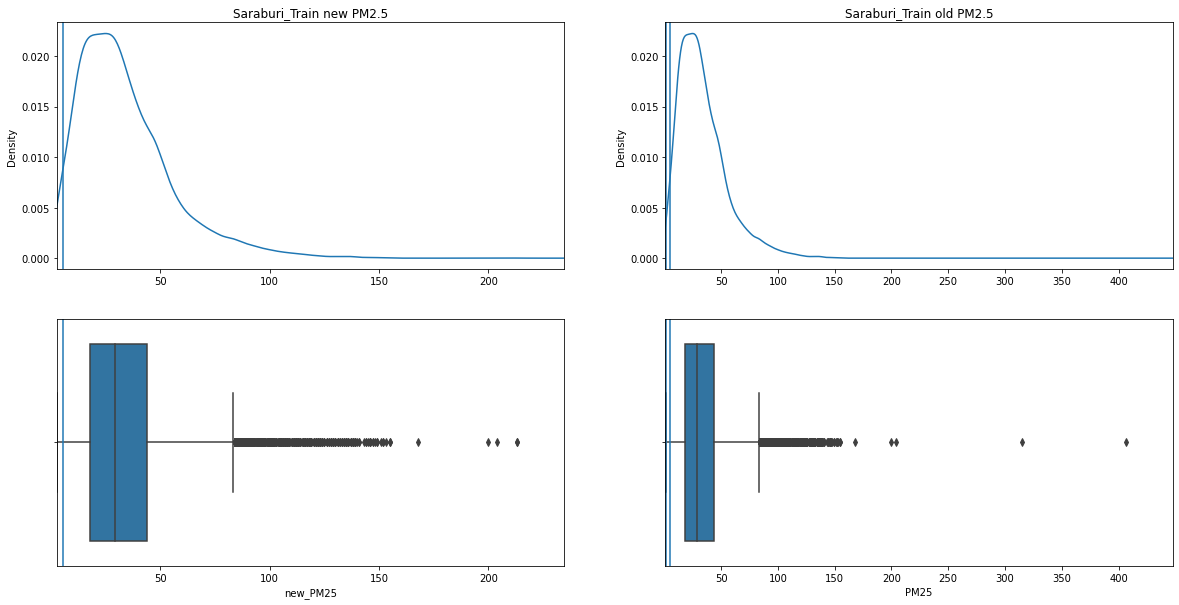

In [ ]:
fig = plt.figure(figsize=(20,10))

handle_outliers.plotIQR('SARA', 'new_PM25', 'Saraburi_Train new PM2.5', thresh, fig=fig, subplots=[221, 223], figsize=(15,10))
handle_outliers.plotIQR('SARA', 'PM25', 'Saraburi_Train old PM2.5', thresh, fig=fig, subplots=[222, 224], figsize=(15,10))
plt.show()

## SARIMAX

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

from cuml.tsa.arima import ARIMA
import math

import pickle

In [ ]:
def visualize(y, pred=None, pred_start=None, lower=None, upper=None):
    n_obs, batch_size = y.shape
    col = ["#1f77b4", "#ff7f0e"]

    # Create the subplots
    c = min(batch_size, 2)
    r = (batch_size + c - 1) // c
    fig, ax = plt.subplots(r, c, squeeze=False)
    ax = ax.flatten()
    
    # Range for the prediction
    if pred is not None:
        pred_start = n_obs if pred_start is None else pred_start
        pred_end = pred_start + pred.shape[0]
    else:
        pred_end = n_obs
    
    # Plot the data
    for i in range(batch_size):
        title = y.columns[i]
        if pred is not None:
            ax[i].plot(np.r_[pred_start:pred_end],
                       pred[pred.columns[i]].to_numpy(),
                       linestyle="--", color=col[1])
        # Prediction intervals
        if lower is not None and upper is not None:
            ax[i].fill_between(np.r_[pred_start:pred_end],
                               lower[lower.columns[i]].to_numpy(),
                               upper[upper.columns[i]].to_numpy(),
                               alpha=0.2, color=col[1])
        ax[i].plot(np.r_[:n_obs], y[title].to_numpy(), color=col[0])
        ax[i].title.set_text(title)
        ax[i].set_xlim((0, pred_end))
    for i in range(batch_size, r*c):
        fig.delaxes(ax[i])
    fig.tight_layout()
    fig.patch.set_facecolor('white')
    plt.show()

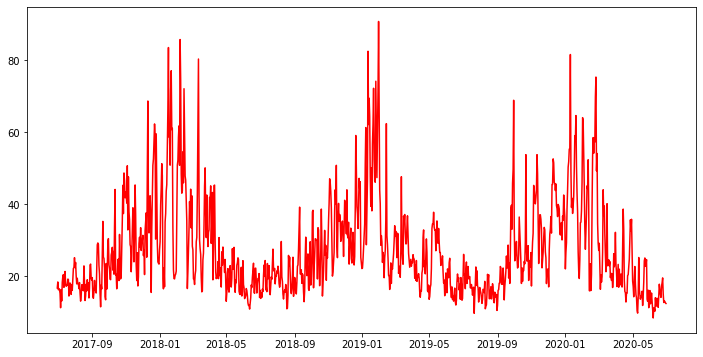

In [ ]:
bkk_train_tmp = handle_outliers.dataset['BKK'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]

bkk_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)

bkk_train_tmp = bkk_train_tmp.resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(bkk_train_tmp['PM25'],'r')

In [ ]:
bkk_train_tmp = cudf.DataFrame.from_pandas(bkk_train_tmp)

In [ ]:
bkk_test = test_set['BKK']
bkk_train_tmp.shape

(1096, 4)

In [ ]:
bkk_test = bkk_test.resample('D').mean()
bkk_test = cudf.DataFrame.from_pandas(bkk_test)
bkk_test.shape

(366, 4)

In [ ]:
train_size, valid_size = bkk_train_tmp.shape[0]-bkk_test.shape[0], bkk_test.shape[0]

bkk_train, bkk_valid = bkk_train_tmp.iloc[:train_size], bkk_train_tmp.iloc[train_size: ],

In [ ]:
bkk_train.shape

(730, 4)

In [ ]:
best_order = (0, 1, 1)
best_seasonal_order = (1, 1, 0, bkk_train.shape[0]//2)

exog_columns = ['Temp', 'WindSpeed', 'WindDir']

In [ ]:
mod_bkk = ARIMA(endog=bkk_train[['PM25']],
              exog=bkk_train[exog_columns],
              order=best_order,
              seasonal_order=best_seasonal_order,
              fit_intercept=False)

mod_bkk.fit()

ARIMA()

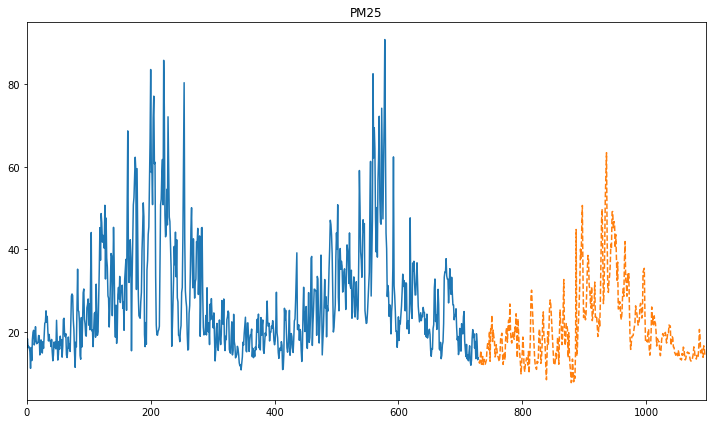

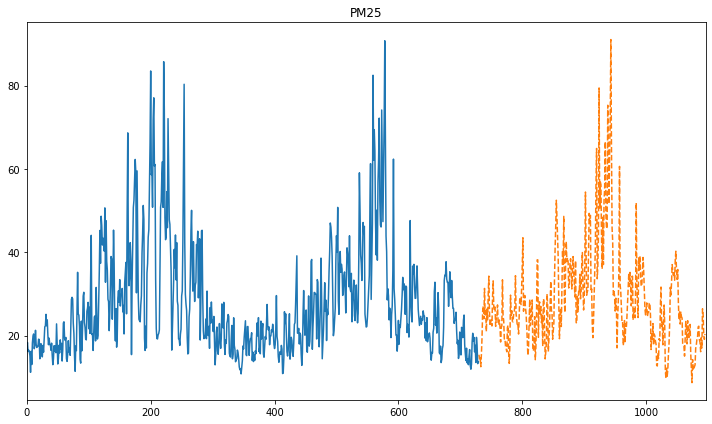

In [ ]:
pred = cudf.DataFrame()
pred['PM25'] = mod_bkk.forecast(bkk_test[['PM25']].shape[0], exog=bkk_test[exog_columns])
visualize(bkk_train[['PM25']], bkk_test[['PM25']])
visualize(bkk_train[['PM25']], pred[['PM25']])

In [ ]:
mse = mean_squared_error(bkk_test['PM25'].to_numpy(), pred['PM25'].to_numpy())
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 13.601595


In [ ]:
# Open file - Write binary mode
model_file = open('mod_bkk[0-1-1_1-1-0-365].model', 'wb')

# Save Decision tree model
pickle.dump(mod_bkk, model_file)

# Close file
model_file.close()

In [ ]:
test_exog = cudf.concat((bkk_valid[exog_columns], bkk_test[exog_columns]), axis=0)

In [ ]:
test_exog.shape

(2928, 3)

In [ ]:
bkk_pred = results_bkk.get_prediction(start=bkk_test.index[0], end=bkk_test.index[-1], exog=test_exog, dynamic=False)
bkk_pred_ci = bkk_pred.conf_int()

In [ ]:
bkk_data = cudf.concat((bkk_train, bkk_valid, bkk_test), axis=0)

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bkk_data['PM25'], color='g',label='ground truth')
plt.plot(pred['PM25'], alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

NameError: ignored

<Figure size 1440x480 with 0 Axes>

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV